In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('culture_ephys_200415.csv')

data2 = data[data['cell_specimen_project_label']== 'hIVSCC-MET']
data2 = data2[['subclass_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data[['cell_specimen_project_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data1.dropna()
data2 = data2.dropna()

data2

,subclass_label,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation
0,LAMP5/PAX6/Other,25.615145,0.064919,-67.400496,292.032540,0.391086,40.787498,3.206679,0.033713
1,LAMP5/PAX6/Other,21.026884,0.005976,-50.248360,371.867418,0.483824,35.718750,3.842133,0.017153
3,LAMP5/PAX6/Other,16.935895,0.034874,-65.238582,252.468705,0.480000,27.900000,2.839593,0.053285
6,LAMP5/PAX6/Other,57.667624,0.147336,-63.207101,841.105652,0.362500,43.531250,3.333950,0.030522
7,LAMP5/PAX6/Other,27.438774,0.049230,-60.421989,260.874897,0.384211,45.293751,2.992211,0.061671
...,...,...,...,...,...,...,...,...,...
958,PVALB,13.677424,0.266409,-48.848053,267.921865,1.135333,17.018749,1.252728,0.001125
959,PVALB,11.421373,0.092579,-66.441664,135.468766,0.370732,37.662498,2.117482,0.024105
961,VIP,25.009076,0.086031,-66.508256,187.656209,0.174112,43.856251,2.772645,0.094960
962,VIP,26.764876,0.179304,-55.004411,263.906240,0.204977,49.118748,2.305283,0.001090


# culture prediction

In [3]:
targets = np.where(data1['cell_specimen_project_label']== 'hIVSCC-METc',1,0)


In [4]:
data1['culture'] = targets

In [5]:
data1.tail()

,cell_specimen_project_label,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation,culture
975,hIVSCC-METc,6.590292,0.502123,-59.947566,124.187462,0.375000,21.468750,1.799062,0.259488,1
976,hIVSCC-METc,8.794312,0.318822,-64.910120,87.187499,0.456293,29.537500,1.675442,-0.078511,1
977,hIVSCC-METc,21.313787,0.088634,-60.149867,353.531271,0.168421,31.931250,3.642535,0.083147,1
979,hIVSCC-METc,9.154594,0.365740,-62.553517,103.986353,0.293966,22.043749,1.764893,0.514772,1
981,hIVSCC-METc,21.882581,0.431700,-65.439883,268.374890,0.389476,52.931248,2.673661,0.014358,1


In [6]:
targets.sum() / targets.shape[0]

0.45254237288135596

In [7]:
data_targets = data1.drop(['cell_specimen_project_label'], axis =1)
data_targets.head()

,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation,culture
0,25.615145,0.064919,-67.400496,292.032540,0.391086,40.787498,3.206679,0.033713,0
1,21.026884,0.005976,-50.248360,371.867418,0.483824,35.718750,3.842133,0.017153,0
3,16.935895,0.034874,-65.238582,252.468705,0.480000,27.900000,2.839593,0.053285,0
6,57.667624,0.147336,-63.207101,841.105652,0.362500,43.531250,3.333950,0.030522,0
7,27.438774,0.049230,-60.421989,260.874897,0.384211,45.293751,2.992211,0.061671,0


In [8]:
data_targets.shape

(590, 9)

In [9]:
unscaled_inputs = data_targets.iloc[:,:-1]

In [10]:
culture_scaler = StandardScaler()

In [11]:
culture_scaler.fit(unscaled_inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_inputs = culture_scaler.transform(unscaled_inputs)

In [13]:
scaled_inputs

array([[ 0.87174103, -1.09398471, -0.87434567, ...,  0.71917439,
         1.26390859, -0.13235446],
       [ 0.34979031, -1.53636676,  2.8131614 , ...,  0.23197431,
         2.15423315, -0.32414951],
       [-0.11559181, -1.31947765, -0.40955956, ..., -0.5195516 ,
         0.74959001,  0.09432274],
       ...,
       [ 0.38242772, -0.91599816,  0.6844542 , ..., -0.13207423,
         1.87457898,  0.44018889],
       [-1.00077577,  1.16377462,  0.16769766, ..., -1.08244515,
        -0.75615568,  5.4391758 ],
       [ 0.44713256,  1.65882002, -0.45283688, ...,  1.88641235,
         0.51710443, -0.35651933]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)

In [15]:
print(x_test.shape, y_test.shape)

(118, 8) (118,)


In [16]:
reg = LogisticRegression()

In [17]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
reg.score(x_train,y_train)

0.8177966101694916

In [19]:
Feature = unscaled_inputs.columns.values

In [20]:
summary_table = pd.DataFrame(columns = ['Feature'], data = Feature)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature,Coefficient,Odds_ratio
1,sag,1.304923,3.687405
0,tau,0.745478,2.107449
5,peak_v_long_square,0.228896,1.257211
4,f_i_curve_slope,0.196289,1.216879
2,vrest,0.153173,1.165526
7,adaptation,-0.385265,0.680270
6,upstroke_downstroke_ratio_long_square,-0.697017,0.498069
3,ri,-0.927306,0.395618


In [21]:
score = reg.score(x_test,y_test)


In [22]:
predictions = reg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

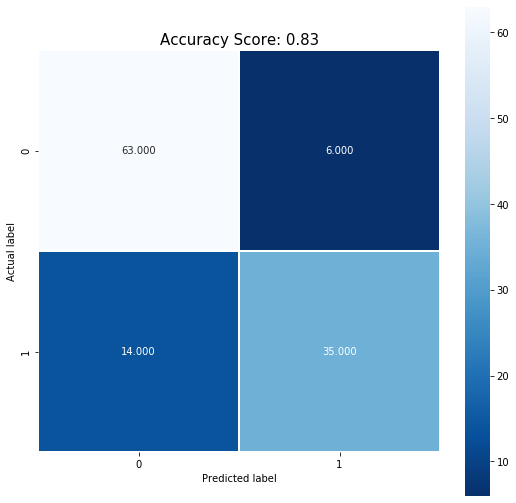

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score)
plt.title(all_sample_title, size = 15);

# human subclass prediction

In [24]:
targets2 = {'LAMP5/PAX6/Other': 0, 'VIP': 1, 'SST':2, 'PVALB':3}
targets = np.array(data2['subclass_label'].map(targets2))
data2['subclass'] = targets
data2

,subclass_label,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation,subclass
0,LAMP5/PAX6/Other,25.615145,0.064919,-67.400496,292.032540,0.391086,40.787498,3.206679,0.033713,0
1,LAMP5/PAX6/Other,21.026884,0.005976,-50.248360,371.867418,0.483824,35.718750,3.842133,0.017153,0
3,LAMP5/PAX6/Other,16.935895,0.034874,-65.238582,252.468705,0.480000,27.900000,2.839593,0.053285,0
6,LAMP5/PAX6/Other,57.667624,0.147336,-63.207101,841.105652,0.362500,43.531250,3.333950,0.030522,0
7,LAMP5/PAX6/Other,27.438774,0.049230,-60.421989,260.874897,0.384211,45.293751,2.992211,0.061671,0
...,...,...,...,...,...,...,...,...,...,...
958,PVALB,13.677424,0.266409,-48.848053,267.921865,1.135333,17.018749,1.252728,0.001125,3
959,PVALB,11.421373,0.092579,-66.441664,135.468766,0.370732,37.662498,2.117482,0.024105,3
961,VIP,25.009076,0.086031,-66.508256,187.656209,0.174112,43.856251,2.772645,0.094960,1
962,VIP,26.764876,0.179304,-55.004411,263.906240,0.204977,49.118748,2.305283,0.001090,1


In [25]:
data_targets2 = data2.drop(['subclass_label'], axis =1)

In [26]:
data_targets2.shape

(323, 9)

In [27]:
unscaled_inputs2 = data_targets2.iloc[:,:-1]

In [28]:
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_inputs2 = subclass_scaler.transform(unscaled_inputs2)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs2, targets, train_size = 0.8, random_state = 20)

In [31]:
print(x_test.shape, y_test.shape)

(65, 8) (65,)


In [32]:
reg = LogisticRegression(multi_class= 'ovr')

In [33]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
reg.score(x_train,y_train)

0.7906976744186046

In [35]:
reg.predict(x_train)

array([0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 3, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 0, 3, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0,
       0, 0, 0, 3, 1, 0, 2, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 1, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 1, 0, 0, 3, 3,
       0, 0, 3, 0, 0, 1, 0, 1, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 1, 3, 3, 0,
       2, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 0, 0, 3, 1], dtype=int64)

In [36]:
Feature = unscaled_inputs2.columns.values
summary_table = pd.DataFrame(columns = ['Feature'], data = Feature)
summary_table['Coefficient1'] = np.transpose(reg.coef_[0])
summary_table['Coefficient2'] = np.transpose(reg.coef_[1])
summary_table['Coefficient3'] = np.transpose(reg.coef_[2])
summary_table['Coefficient4'] = np.transpose(reg.coef_[3])
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient1)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature,Coefficient1,Coefficient2,Coefficient3,Coefficient4,Odds_ratio
6,upstroke_downstroke_ratio_long_square,2.139415,-0.582150,-0.449740,-2.481622,8.494470
3,ri,0.373526,0.517735,-0.458001,-1.105692,1.452848
2,vrest,-0.045342,0.083989,-0.366644,0.384840,0.955670
5,peak_v_long_square,-0.054863,-0.109825,0.552122,-0.251837,0.946614
1,sag,-0.168102,0.363061,0.432980,-0.430339,0.845268
7,adaptation,-0.296417,0.198987,-0.355029,0.042508,0.743477
4,f_i_curve_slope,-0.436832,-0.063238,0.171182,0.480724,0.646080
0,tau,-0.555297,0.404669,1.032681,-1.614735,0.573902


In [37]:
reg.coef_

array([[-0.55529708, -0.16810198, -0.04534229,  0.37352588, -0.43683249,
        -0.05486337,  2.13941532, -0.2964169 ],
       [ 0.40466939,  0.36306135,  0.08398883,  0.51773475, -0.06323777,
        -0.10982455, -0.58215036,  0.19898718],
       [ 1.0326814 ,  0.4329795 , -0.36664386, -0.45800075,  0.17118172,
         0.55212228, -0.4497401 , -0.35502927],
       [-1.61473537, -0.43033936,  0.38484002, -1.10569177,  0.48072378,
        -0.25183653, -2.48162199,  0.042508  ]])

In [38]:
score = reg.score(x_test,y_test)

In [39]:
predictions = reg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

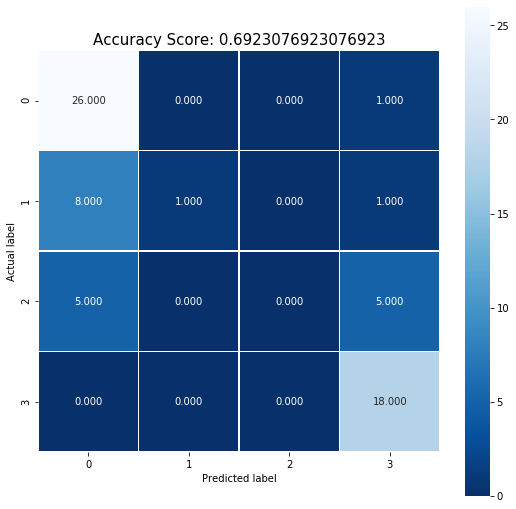

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# mouse subclass predictions

In [41]:
data = pd.read_csv('mouse_ephys_200416.csv')
data1 = data[data['Norm_Marker_Sum.0.4_label']== True]
#data1 = data1[data1['broad_class_label']== 'GABAergic']
data1 = data1[data1['subclass_label'].isin(['Lamp5','Vip','Sst','Pvalb'])]
data1 = data1[['subclass_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data1.dropna()
data1.subclass_label.unique()

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,41,256,265,276) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['Lamp5', 'Vip', 'Sst', 'Pvalb'], dtype=object)

In [42]:
target = {'Lamp5': 0,'Vip':1, 'Sst':2, 'Pvalb':3}
targets = np.array(data1['subclass_label'].map(target))
data1['subclass'] = targets
data1

,subclass_label,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation,subclass
1101,Lamp5,5.837121,0.033936,-74.639148,67.500003,0.158571,31.312500,4.222604,0.002929,0
1102,Lamp5,10.905297,0.029682,-65.556981,168.718725,0.130000,29.568750,3.150607,0.453605,0
1104,Lamp5,16.654066,0.231879,-69.985781,208.031267,0.014732,41.125000,2.997772,0.198428,0
1105,Lamp5,13.974860,0.105517,-68.949945,238.968804,0.260000,21.131250,3.737771,0.024273,0
1106,Lamp5,10.492158,0.150462,-67.732542,202.656180,0.240000,22.712500,3.268223,0.006093,0
...,...,...,...,...,...,...,...,...,...,...
8117,Vip,10.381157,0.077402,-72.156763,285.937488,0.414894,26.337500,3.216876,0.048587,1
8162,Vip,12.687726,0.184129,-57.116054,232.500076,0.080000,40.899998,2.635290,0.070356,1
8301,Pvalb,17.116914,0.082474,-75.781204,157.343745,0.265714,15.000000,2.268127,0.435415,3
8351,Lamp5,9.043084,0.071921,-68.029941,170.625120,0.230000,29.643749,3.348968,0.013739,0


In [43]:
data_targets = data1.drop(['subclass_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)
reg = LogisticRegression(multi_class= 'ovr')
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9129183159409859

### multiple logistic regression

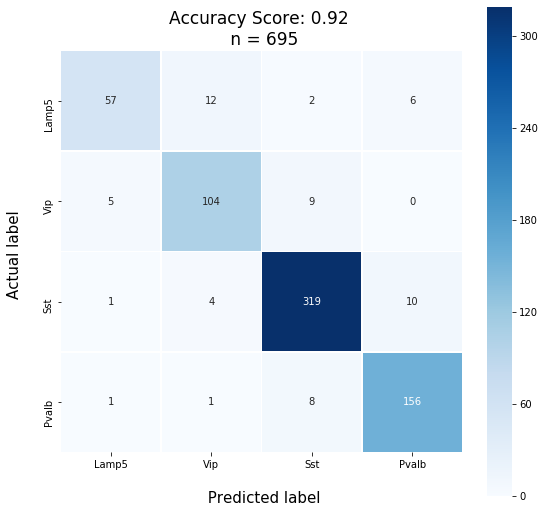

In [44]:
score = reg.score(x_test,y_test)
predictions = reg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['Lamp5', 'Vip',
    'Sst','Pvalb'], yticklabels = ['Lamp5', 'Vip','Sst','Pvalb'])
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png')

In [45]:
Feature = unscaled_inputs.columns.values
summary_table = pd.DataFrame(columns = ['Feature'], data = Feature)
summary_table['Lamp5'] = np.transpose(reg.coef_[0])
summary_table['Vip'] = np.transpose(reg.coef_[1])
summary_table['Sst'] = np.transpose(reg.coef_[2])
summary_table['Pvalb'] = np.transpose(reg.coef_[3])
#summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient1)
summary_table.sort_values('Lamp5', ascending=False)

,Feature,Lamp5,Vip,Sst,Pvalb
6,upstroke_downstroke_ratio_long_square,2.102519,1.321865,-2.863210,-3.301957
2,vrest,0.384282,0.020265,-0.426249,0.216075
1,sag,0.190782,0.241973,0.151058,-0.547054
5,peak_v_long_square,-0.796153,0.568286,0.364404,-0.442066
7,adaptation,-0.907045,0.460001,0.307765,-0.336124
4,f_i_curve_slope,-1.348148,-0.839723,-0.778557,0.978843
3,ri,-1.747316,2.314401,-0.443043,-0.523284
0,tau,-2.255083,-2.661813,5.044616,-3.234455


### linear support vector machine

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
svclassifier.score(x_train, y_train)

0.920115149334293

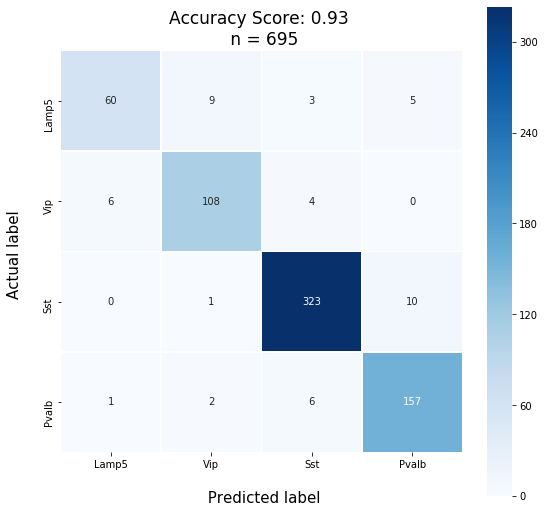

In [48]:
score = svclassifier.score(x_test,y_test)
predictions = svclassifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['Lamp5', 'Vip',
    'Sst','Pvalb'], yticklabels = ['Lamp5', 'Vip','Sst','Pvalb'])
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png')

### k-nearest neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.9355883411299029

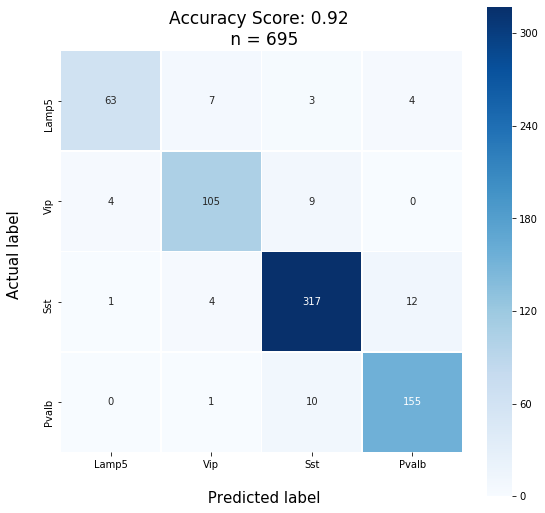

In [50]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['Lamp5', 'Vip',
    'Sst','Pvalb'], yticklabels = ['Lamp5', 'Vip','Sst','Pvalb'])
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png')

### random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.9982007916516733

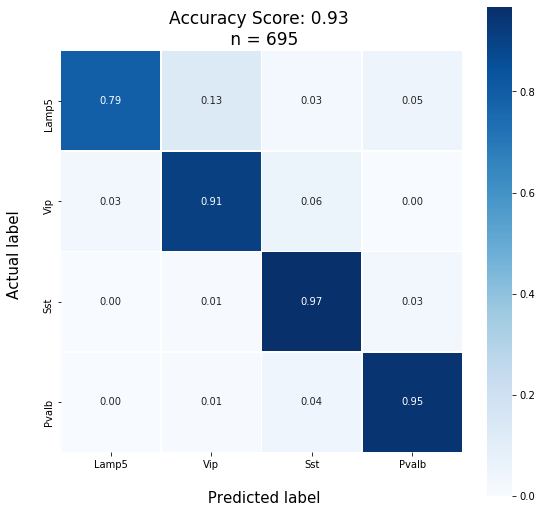

In [52]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = ['Lamp5', 'Vip',
    'Sst','Pvalb'], yticklabels = ['Lamp5', 'Vip','Sst','Pvalb'])
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17);
#plt.savefig('inh_mouse_confusion_matrix.png')

In [53]:
data.subclass_label.unique()

array(['L2/3 IT', 'L4', 'L5 IT', 'L6 IT', 'L5 PT', 'NP', 'L6 CT', 'L6b',
       'Lamp5', 'Sncg', 'Serpinf1', 'Vip', 'Sst', 'Pvalb', 'Meis2'],
      dtype=object)

# mouse all subclasses

In [54]:
data = pd.read_csv('mouse_ephys_200416.csv')
data1 = data[data['Norm_Marker_Sum.0.4_label']== True]
data1 = data1[data1['subclass_label'].isin(['Lamp5','Vip','Sst','Pvalb','L2/3 IT', 'L4', 'L5 IT', 'L6 IT', 'L5 PT', 'L6 CT'])]
data1 = data1[['subclass_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data1.dropna()
target = {'Lamp5': 0,'Vip':1, 'Sst':2, 'Pvalb':3,'L2/3 IT':4, 'L4':5, 'L5 IT':6, 'L6 IT':7, 'L5 PT':8, 'L6 CT': 9}
targets = np.array(data1['subclass_label'].map(target))
data1['subclass'] = targets
data1

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,41,256,265,276) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subclass_label,tau,sag,vrest,ri,f_i_curve_slope,peak_v_long_square,upstroke_downstroke_ratio_long_square,adaptation,subclass
0,L2/3 IT,12.724680,0.005716,-77.179931,76.937564,0.100000,49.381248,4.986178,0.077057,4
1,L2/3 IT,32.730337,0.148452,-52.933337,-69.077745,0.089286,53.837498,4.847608,0.069877,4
2,L2/3 IT,13.482822,-0.053955,-72.399085,105.749935,0.200000,49.099998,4.065621,0.022504,4
3,L2/3 IT,10.552282,0.005993,-76.888763,73.562428,0.171028,23.887499,3.472036,0.057070,4
4,L2/3 IT,20.576018,0.037385,-78.240069,87.781183,0.100000,55.893749,6.194862,0.054941,4
...,...,...,...,...,...,...,...,...,...,...
8301,Pvalb,17.116914,0.082474,-75.781204,157.343745,0.265714,15.000000,2.268127,0.435415,3
8341,L2/3 IT,16.490408,0.006847,-74.865149,144.687504,0.133571,26.500000,3.589829,0.082810,4
8351,Lamp5,9.043084,0.071921,-68.029941,170.625120,0.230000,29.643749,3.348968,0.013739,0
8352,Vip,15.908945,0.073339,-70.262678,282.343864,0.034127,11.800000,2.782984,0.244750,1


In [55]:
data_targets = data1.drop(['subclass_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.99825

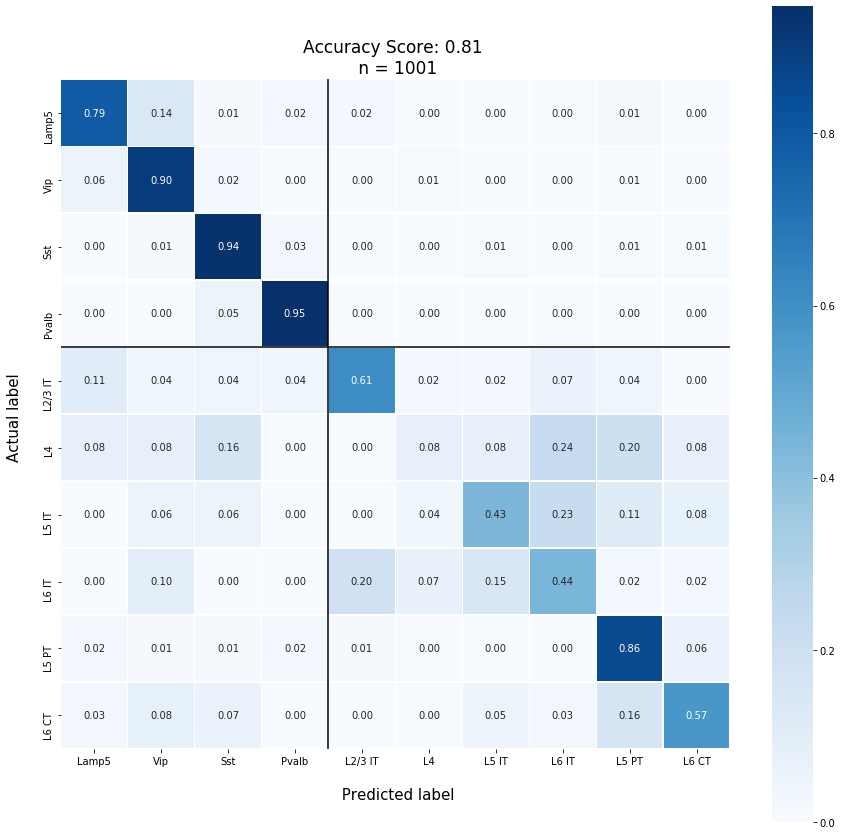

In [56]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
           yticklabels = ['Lamp5','Vip','Sst','Pvalb','L2/3 IT', 'L4', 'L5 IT', 'L6 IT', 'L5 PT', 'L6 CT'],
           xticklabels = ['Lamp5','Vip','Sst','Pvalb','L2/3 IT', 'L4', 'L5 IT', 'L6 IT', 'L5 PT', 'L6 CT'])
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.axvline(4,color='black', linestyle='-')
plt.axhline(4,color='black', linestyle='-')
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png', dpi =300)

In [57]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = unscaled_inputs.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
upstroke_downstroke_ratio_long_square,0.265316
tau,0.168243
ri,0.131688
f_i_curve_slope,0.119367
sag,0.101929
adaptation,0.090052
peak_v_long_square,0.067707
vrest,0.055698


# brain region

In [58]:
from sklearn.utils import resample

In [59]:
data = pd.read_csv("all_mouse_regions_ephys_200417.csv")


C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (260,269,280) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
data["region"] = pd.np.where(data.patchseq_roi_label.str.contains("RSP"), "RSP", 
                                      pd.np.where(data.patchseq_roi_label.str.contains("VISp"), "VISp", 
                                      pd.np.where(data.patchseq_roi_label.str.contains("TEa"), "TEa",
                                      pd.np.where(data.patchseq_roi_label.str.contains("CTXsp"), "CLA",
                                      pd.np.where(data.patchseq_roi_label.str.contains("MO"), "MO",
                                      pd.np.where(data.patchseq_roi_label.str.contains("ORB"), "ORB",
                                      pd.np.where(data.patchseq_roi_label.str.contains("SSp"), "SSp", 'Unknown')
                                                 ))))))

In [61]:
data1 = data[['region','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data1.dropna()
data2 = data1[data1.region != "MO"]
data2 = data2[data2.region != "CLA"]


data2.region.value_counts()

VISp    4285
RSP      139
TEa       97
ORB       73
Name: region, dtype: int64

In [62]:
# Separate majority and minority classes
visp = data2[data2.region== "VISp"]
minority = data2[data2.region != "VISp"]
 
# Downsample majority class
downsampled = resample(visp, replace=False,    # sample without replacement
                                 n_samples= 140,     # to match minority class
                                 random_state= 1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([downsampled, minority])
 
# Display new class counts
# df_downsampled.roi.value_counts()

target = {'VISp': 0,'RSP':1, 'TEa':2, 'ORB':3}
targets = np.array(df_downsampled['region'].map(target))
df_downsampled['roi'] = targets

df_downsampled.roi.value_counts()

0    140
1    139
2     97
3     73
Name: roi, dtype: int64

In [63]:
data_targets = df_downsampled.drop(['region'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

1.0

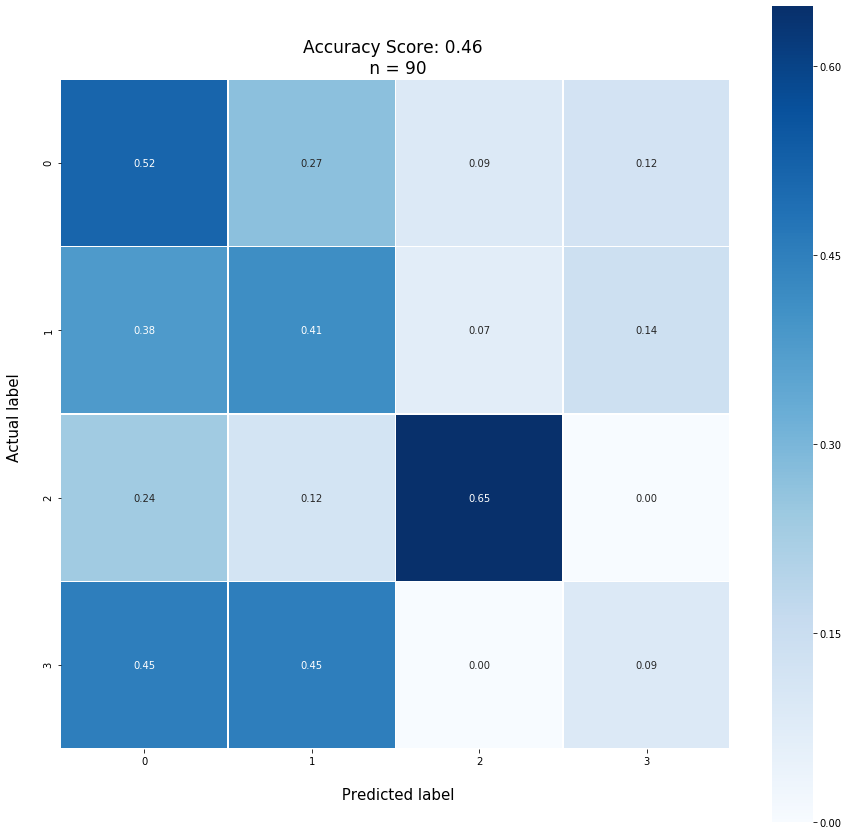

In [64]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png', dpi =300)

umap for brain region

predict morpho?

predict 63x go?

revisit human sublcass

# 63x go

In [65]:
data = pd.read_csv('mouse_ephys_200416.csv')
data.columns.values
data1 = data[data['go_no_go_63x_label'] != 'ZZ_Missing']
data1 = data1[['go_no_go_63x_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation']]
data1 = data1.dropna()

go = data1[data1['go_no_go_63x_label']== '63x go']
minority = data1[data1['go_no_go_63x_label']!= '63x go']
 
# Downsample majority class
downsampled = resample(go, replace=False,    # sample without replacement
                                 n_samples= 1500,     # to match minority class
                                 random_state= 1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([downsampled, minority])






target = {'63x go': 0,'63x no go':1}
targets = np.array(df_downsampled['go_no_go_63x_label'].map(target))
df_downsampled['63x'] = targets
df_downsampled['63x'].value_counts()

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,41,256,265,276) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0    1500
1    1474
Name: 63x, dtype: int64

In [66]:
data_targets = df_downsampled.drop(['go_no_go_63x_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.5548549810844893

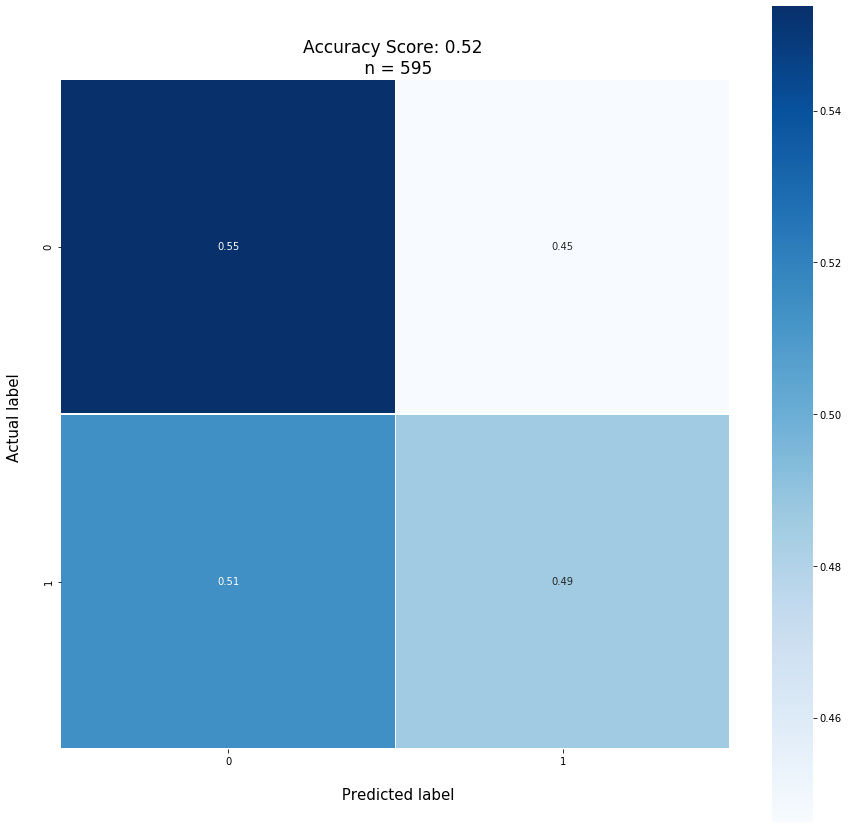

In [67]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
#plt.axvline(4,color='black', linestyle='-')
#plt.axhline(4,color='black', linestyle='-')
plt.title(all_sample_title, size = 17);
#plt.savefig('mouse_confusion_matrix.png', dpi =300)

# revisiting human subclasses

In [555]:
# features = ['tau', 'upstroke_downstroke_ratio_short_square',
#        'threshold_v_ramp',
#        'peak_v_short_square', 'upstroke_downstroke_ratio_ramp', 'sag',
#        'threshold_t_ramp', 'vrest',
#        'trough_t_ramp', 'trough_v_long_square',
#        'threshold_t_short_square','trough_t_short_square',
#        'fast_trough_v_ramp', 'trough_t_long_square','peak_t_ramp',
#        'threshold_v_long_square', 'fast_trough_t_long_square', 'ri',
#        'threshold_v_short_square', 'avg_isi',
#        'threshold_i_long_square',
#        'threshold_i_short_square', 'peak_v_ramp',
#        'fast_trough_v_short_square', 'fast_trough_t_short_square',
#        'fast_trough_t_ramp',
#        'threshold_i_ramp',
#        'peak_t_short_square',
#        'trough_v_short_square', 'f_i_curve_slope',
#        'peak_t_long_square', 'latency', 'fast_trough_v_long_square',
#        'upstroke_downstroke_ratio_long_square', 'trough_v_ramp',
#        'peak_v_long_square', 'adaptation', 'fast_ahp']

# features = ['upstroke_downstroke_ratio_ramp',
#        'upstroke_downstroke_ratio_long_square', 'tau',
#        'upstroke_downstroke_ratio_short_square', 'ri', 'sag',
#        'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
#        'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
#        'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
#        'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']

features = ['upstroke_downstroke_ratio_long_square', 'tau',
       'ri', 'sag',
       'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
       'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
       'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
       'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']



In [556]:
culture_data = pd.read_csv('culture_ephys_200415.csv')
data = pd.read_csv('human_200428.csv')
data1 = pd.concat([culture_data, data])
data1['fast_ahp']= data1['threshold_v_short_square'] - data1['fast_trough_v_short_square']
data1 = data1[data1['Norm_Marker_Sum.0.4_label']== True]
#data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)','L5 ET'])]
data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP'])]
#data1 = data1[['subclass_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation', 'fast_ahp']]
data1 = data1[['subclass_label'] + features]
data1 = data1.dropna()

#data1.dropna(thresh=10, inplace= True)


data1.subclass_label.value_counts()



C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


LAMP5/PAX6/Other    333
PVALB               245
VIP                 129
SST                 119
Name: subclass_label, dtype: int64

In [557]:
df_majority = data1[data1['subclass_label'].isin(['SST','VIP','IT (L3-5)','IT (L2-3)','IT (L4-6)'])]
df_minority = data1[data1['subclass_label'] == 'LAMP5/PAX6/Other']
df_minority2 = data1[data1['subclass_label'] == 'PVALB']
 
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=False,     # sample with replacement
                                 n_samples=130,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled2 = resample(df_minority2, 
                                 replace=False,     # sample with replacement
                                 n_samples=130,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority_upsampled2])
 
# Display new class counts
df_upsampled.subclass_label.value_counts()

PVALB               130
LAMP5/PAX6/Other    130
VIP                 129
SST                 119
Name: subclass_label, dtype: int64

In [558]:
target = {'LAMP5/PAX6/Other': 0,'PVALB':1, 'SST':2, 'VIP':3}
#target = {'LAMP5/PAX6/Other': 0,'PVALB':1, 'SST':2, 'VIP':3,'IT (L2-3)':4,'IT (L3-5)':5,'IT (L4-6)':6}
targets = np.array(df_upsampled['subclass_label'].map(target))
df_upsampled['subclass'] = targets

In [559]:
from sklearn.model_selection import cross_val_score


In [560]:
data_targets = df_upsampled.drop(['subclass_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
# imputer = KNNImputer(n_neighbors=5)
# unscaled_inputs = imputer.fit_transform(unscaled_inputs)
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)
#x_train, x_test, y_train, y_test = train_test_split(X_new, targets, train_size = 0.8, random_state = 20)

classifier = RandomForestClassifier(n_estimators=60, random_state= 0, class_weight = {0:1,1:1,2:2,3:1})
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)
scores = cross_val_score(classifier, scaled_inputs, targets, cv=5)
scores

array([0.85294118, 0.71568627, 0.82352941, 0.84158416, 0.86138614])

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

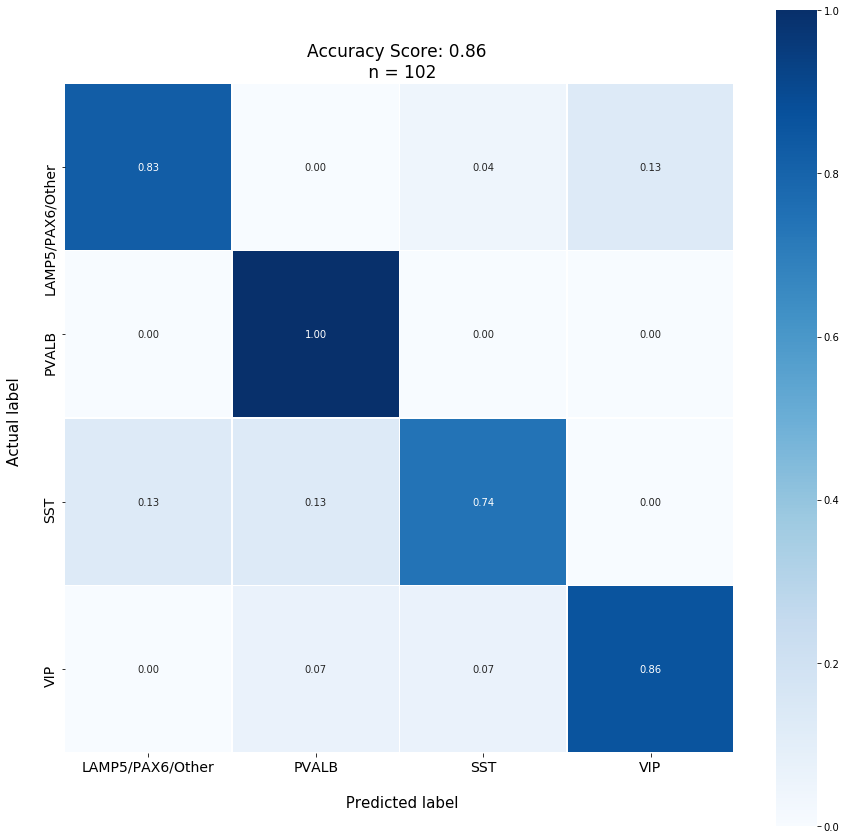

In [561]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))
# sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
#            yticklabels = ['LAMP5/PAX6/Other','PVALB','SST', 'VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)'],
#            xticklabels = ['LAMP5/PAX6/Other','PVALB','SST','VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)'], vmax=1)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
            yticklabels = ['LAMP5/PAX6/Other','PVALB','SST', 'VIP'],
            xticklabels = ['LAMP5/PAX6/Other','PVALB','SST','VIP'], vmax=1)
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17)
plt.xticks(size=14)
plt.yticks(size=14)
#plt.savefig('human_confusion_matrix_200511.png', dpi =300)

In [183]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = unscaled_inputs.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
upstroke_downstroke_ratio_long_square,0.116738
tau,0.088439
sag,0.079103
fast_ahp,0.067279
ri,0.065790
fast_trough_v_ramp,0.056786
threshold_t_ramp,0.055937
fast_trough_v_long_square,0.055685
threshold_i_short_square,0.054527
adaptation,0.053498


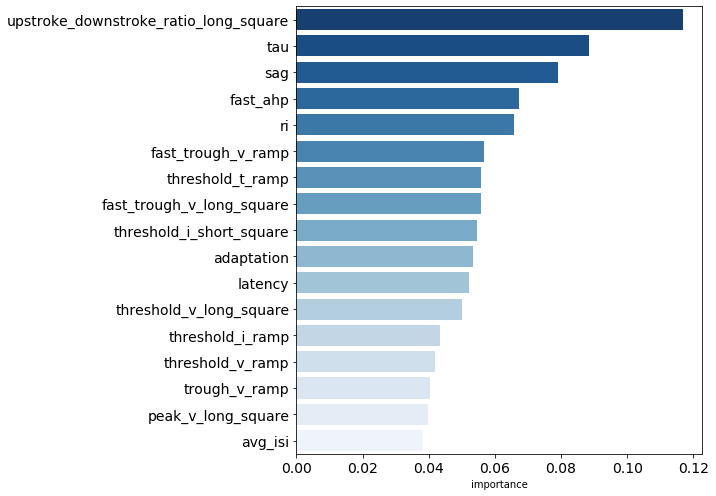

In [184]:
plt.figure(figsize=(10,7))
sns.barplot(x= feature_importances.importance, y=feature_importances.index, palette = 'Blues_r')
plt.xticks(size= 14)
plt.yticks(size = 14)
plt.tight_layout()
#plt.savefig('feature_importance_200504.png')

## save the model

In [228]:
import pickle

In [562]:
with open('human_subclass_model', 'wb') as file:
    pickle.dump(classifier, file)
    
with open('human_subclass_scaler', 'wb') as file:
    pickle.dump(subclass_scaler, file)

In [571]:
class Subclass_model():
    
    def __init__(self, model_file, scaler_file):
        #read model and scaler files which were saved
        with open('human_subclass_model', 'rb') as model_file, open('human_subclass_scaler', 'rb') as scaler_file:
            self.classifier = pickle.load(model_file)
            self.scaler = pickle.load(scaler_file)
            self.data = None
            
    def load_and_clean_data(self, data_file):
        #import data
        df = pd.read_csv(data_file)
        #store data in a new variable for later use
        self.df_with_predicitons = df.copy()
        df['fast_ahp']= df['threshold_v_short_square'] - df['fast_trough_v_short_square']
#         features = ['tau', 'upstroke_downstroke_ratio_short_square',
#            'threshold_v_ramp',
#            'peak_v_short_square', 'upstroke_downstroke_ratio_ramp', 'sag',
#            'threshold_t_ramp', 'vrest',
#            'trough_t_ramp', 'trough_v_long_square',
#            'threshold_t_short_square','trough_t_short_square',
#            'fast_trough_v_ramp', 'trough_t_long_square','peak_t_ramp',
#            'threshold_v_long_square', 'fast_trough_t_long_square', 'ri',
#            'threshold_v_short_square', 'avg_isi',
#            'threshold_i_long_square',
#            'threshold_i_short_square', 'peak_v_ramp',
#            'fast_trough_v_short_square', 'fast_trough_t_short_square',
#            'fast_trough_t_ramp',
#            'threshold_i_ramp',
#            'peak_t_short_square',
#            'trough_v_short_square', 'f_i_curve_slope',
#            'peak_t_long_square', 'latency', 'fast_trough_v_long_square',
#            'upstroke_downstroke_ratio_long_square', 'trough_v_ramp',
#            'peak_v_long_square', 'adaptation', 'fast_ahp']

#         features = ['upstroke_downstroke_ratio_ramp',
#                'upstroke_downstroke_ratio_long_square', 'tau',
#                'upstroke_downstroke_ratio_short_square', 'ri', 'sag',
#                'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
#                'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
#                'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
#                'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']
    
    
        features = ['upstroke_downstroke_ratio_long_square', 'tau',
               'ri', 'sag',
               'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
               'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
               'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
               'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']
    
        

        
        
        
        df2 = df[features + ['specimen_id', 'name']]
        df = df[features]
        df = df.dropna()
        df2 = df2.dropna()
        self.preprocessed_data = df2.copy()
        
        self.data = self.scaler.transform(df)

        
    def predicted_probability(self):
        if (self.data is not None):
            pred = self.classifier.predict_proba(self.data)
            return pred
        
    def predicted_output_category(self):
        if (self.data is not None):
            pred_outputs = self.classifier.predict(self.data)
            return pred_outputs
            
    def predicted_outputs(self):
        targets = {0:'Lamp5/Pax6/Other', 1: 'Pvalb', 2:'Sst', 3:'Vip', 4:'Excitatory'}
        if (self.data is not None):
            self.preprocessed_data['prediction'] = self.classifier.predict(self.data)
            #return self.preprocessed_data[['specimen_id','name','qualitative call','prediction']]
            self.preprocessed_data['predicted_subclass'] = self.preprocessed_data['prediction'].map(targets)
        
            #return self.preprocessed_data[['specimen_id','name','prediction','predicted_subclass']]
            return self.preprocessed_data[['specimen_id','prediction','predicted_subclass']]

In [572]:
ME = pd.read_csv('ME_200501.csv')
mouse = pd.read_csv('mouse_ephys_200416.csv')

new = ME[ME['specimen_id'].isin([571435969.0, 571718621.0,614651270.0, 571700636.0,571427524.0])]
call = {614651270.0: 'basket cell',571427524.0: 'basket cell',
        571718621.0 : 'martinotti cell',571700636.0:'martinotti cell',
        571435969.0: 'bitufted cell'}  
new['qualitative call'] = new['specimen_id'].map(call)


new.to_csv('ME_tests.csv')


brian_test = pd.read_csv("ephys_cells_to_test.csv")


brian_test_df = pd.merge(left = brian_test, 
                    right = mouse, 
                    left_on = 'Cell Specimen Id', 
                    right_on = 'specimen_id', 
                    how = 'left')

brian_test_df.to_csv('brain_test_df.csv')

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,41,256,265,276) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [573]:
model_file = pickle.load(open('human_subclass_model', 'rb'))
scaler_file = pickle.load(open('human_subclass_scaler', 'rb'))

In [574]:
test = Subclass_model(model_file, scaler_file)

In [575]:
test.load_and_clean_data('ME_200501.csv')
#test.load_and_clean_data('brain_test_df.csv')

#test.load_and_clean_data('ME_tests.csv')
#test.load_and_clean_data('test200508.csv')

In [576]:
test.predicted_outputs()

,specimen_id,prediction,predicted_subclass
2,485537619.0,0,Lamp5/Pax6/Other
3,486748229.0,0,Lamp5/Pax6/Other
5,486749782.0,2,Sst
6,486940963.0,0,Lamp5/Pax6/Other
7,488385201.0,0,Lamp5/Pax6/Other
...,...,...,...
890,642981071.0,0,Lamp5/Pax6/Other
891,643572206.0,1,Pvalb
894,643584386.0,1,Pvalb
897,643601251.0,2,Sst


In [361]:
test.predicted_probability()

array([[0.48333333, 0.        , 0.03333333, 0.1       , 0.38333333],
       [0.06666667, 0.01666667, 0.05      , 0.        , 0.86666667],
       [0.08333333, 0.08333333, 0.13333333, 0.05      , 0.65      ],
       ...,
       [0.05      , 0.6       , 0.26666667, 0.08333333, 0.        ],
       [0.08333333, 0.06666667, 0.11666667, 0.05      , 0.68333333],
       [0.15      , 0.01666667, 0.35      , 0.2       , 0.28333333]])

In [238]:
target

{'LAMP5/PAX6/Other': 0,
 'PVALB': 1,
 'SST': 2,
 'VIP': 3,
 'IT (L2-3)': 4,
 'IT (L3-5)': 4,
 'IT (L4-6)': 4,
 'L5 ET': 4,
 'IT (L6)': 4,
 'L6b': 4,
 'L5/6 NP': 4,
 'L5/6 CT': 4}

In [87]:
o o x x o

SyntaxError: invalid syntax (<ipython-input-87-2ac14603ebb0>, line 1)

In [ ]:
data[data['cell_name'] == 'H18.03.009.11.16.02']

# Adding back in Excitatory

In [464]:
# features = ['tau', 'upstroke_downstroke_ratio_short_square',
#        'threshold_v_ramp',
#        'peak_v_short_square', 'upstroke_downstroke_ratio_ramp', 'sag',
#        'threshold_t_ramp', 'vrest',
#        'trough_t_ramp', 'trough_v_long_square',
#        'threshold_t_short_square','trough_t_short_square',
#        'fast_trough_v_ramp', 'trough_t_long_square','peak_t_ramp',
#        'threshold_v_long_square', 'fast_trough_t_long_square', 'ri',
#        'threshold_v_short_square', 'avg_isi',
#        'threshold_i_long_square',
#        'threshold_i_short_square', 'peak_v_ramp',
#        'fast_trough_v_short_square', 'fast_trough_t_short_square',
#        'fast_trough_t_ramp',
#        'threshold_i_ramp',
#        'peak_t_short_square',
#        'trough_v_short_square', 'f_i_curve_slope',
#        'peak_t_long_square', 'latency', 'fast_trough_v_long_square',
#        'upstroke_downstroke_ratio_long_square', 'trough_v_ramp',
#        'peak_v_long_square', 'adaptation', 'fast_ahp']

# features = ['upstroke_downstroke_ratio_ramp',
#        'upstroke_downstroke_ratio_long_square', 'tau',
#        'upstroke_downstroke_ratio_short_square', 'ri', 'sag',
#        'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
#        'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
#        'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
#        'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']

features = ['upstroke_downstroke_ratio_long_square', 'tau',
       'ri', 'sag',
       'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
       'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
       'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
       'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']



In [465]:
data.subclass_label.value_counts()

LAMP5/PAX6/Other    678
IT (L2-3)           618
PVALB               527
SST                 407
IT (L3-5)           327
VIP                 315
IT (L4-6)           293
IT (L6)             195
L6b                  88
L5 ET                71
L5/6 NP              41
L5/6 CT              32
Name: subclass_label, dtype: int64

In [466]:
culture_data = pd.read_csv('culture_ephys_200415.csv')
data = pd.read_csv('human_200428.csv')
data1 = pd.concat([culture_data, data])
data1['fast_ahp']= data1['threshold_v_short_square'] - data1['fast_trough_v_short_square']
data1 = data1[data1['Norm_Marker_Sum.0.4_label']== True]
data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)','L5 ET', 'IT (L6)','L6b', 'L5/6 NP', 'L5/6 CT'])]
#data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP'])]
#data1 = data1[['subclass_label','tau','sag', 'vrest', 'ri', 'f_i_curve_slope', 'peak_v_long_square', 'upstroke_downstroke_ratio_long_square','adaptation', 'fast_ahp']]
data1 = data1[['subclass_label'] + features]
data1 = data1.dropna()

#data1.dropna(thresh=10, inplace= True)


data1.subclass_label.value_counts()



C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


LAMP5/PAX6/Other    333
PVALB               245
IT (L3-5)           165
IT (L2-3)           160
VIP                 129
SST                 119
IT (L4-6)           110
IT (L6)               9
L5/6 NP               8
L5/6 CT               2
Name: subclass_label, dtype: int64

In [467]:
df_majority = data1[data1['subclass_label'].isin(['SST','VIP','L5 ET', 'IT (L6)','L6b', 'L5/6 NP', 'L5/6 CT'])]
df_minority = data1[data1['subclass_label'] == 'LAMP5/PAX6/Other']
df_minority2 = data1[data1['subclass_label'] == 'PVALB']
df_minority3 = data1[data1['subclass_label'] == 'IT (L3-5)']
df_minority4 = data1[data1['subclass_label'] == 'IT (L2-3)']
df_minority5 = data1[data1['subclass_label'] == 'IT (L4-6)']

#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=False,     # sample with replacement
                                 n_samples=130,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled2 = resample(df_minority2, 
                                 replace=False,     # sample with replacement
                                 n_samples=130,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled3 = resample(df_minority3, 
                                 replace=False,     # sample with replacement
                                 n_samples=40,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled4 = resample(df_minority4, 
                                 replace=False,     # sample with replacement
                                 n_samples=40,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled5 = resample(df_minority5, 
                                 replace=False,     # sample with replacement
                                 n_samples=40,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority_upsampled2, df_minority_upsampled3, df_minority_upsampled4, df_minority_upsampled5])
 
# Display new class counts
df_upsampled.subclass_label.value_counts()

PVALB               130
LAMP5/PAX6/Other    130
VIP                 129
SST                 119
IT (L4-6)            40
IT (L2-3)            40
IT (L3-5)            40
IT (L6)               9
L5/6 NP               8
L5/6 CT               2
Name: subclass_label, dtype: int64

In [468]:
#target = {'LAMP5/PAX6/Other': 0,'PVALB':1, 'SST':2, 'VIP':3}
target = {'LAMP5/PAX6/Other': 0,'PVALB':1, 'SST':2, 'VIP':3,'IT (L2-3)':4,'IT (L3-5)':4,'IT (L4-6)':4 ,'L5 ET':4, 'IT (L6)':4,'L6b':4, 'L5/6 NP':4, 'L5/6 CT':4}
targets = np.array(df_upsampled['subclass_label'].map(target))
df_upsampled['subclass'] = targets

In [469]:
data_targets = df_upsampled.drop(['subclass_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
# imputer = KNNImputer(n_neighbors=5)
# unscaled_inputs = imputer.fit_transform(unscaled_inputs)
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)
#x_train, x_test, y_train, y_test = train_test_split(X_new, targets, train_size = 0.8, random_state = 20)

classifier = RandomForestClassifier(n_estimators=60, random_state= 0, class_weight = {0:1,1:1,2:3,3:1,4:1})
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)
scores = cross_val_score(classifier, scaled_inputs, targets, cv=5)
scores

array([0.83076923, 0.76153846, 0.82945736, 0.79069767, 0.84496124])

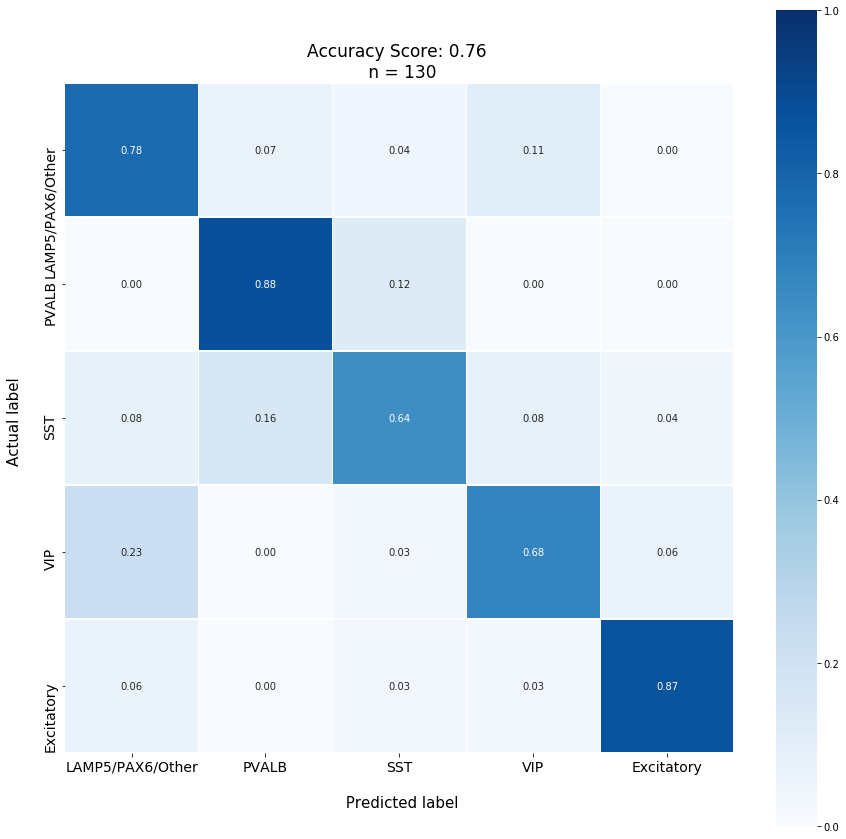

In [471]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))
# sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
#            yticklabels = ['LAMP5/PAX6/Other','PVALB','SST', 'VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)'],
#            xticklabels = ['LAMP5/PAX6/Other','PVALB','SST','VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)'], vmax=1)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
            yticklabels = ['LAMP5/PAX6/Other','PVALB','SST', 'VIP','Excitatory'],
            xticklabels = ['LAMP5/PAX6/Other','PVALB','SST','VIP','Excitatory'], vmax=1)
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17)
plt.xticks(size=14)
plt.yticks(size=14)
#plt.savefig('human_confusion_matrix_200526.png', dpi =300)

could add excitatory IT types
could try inhib ttypes
could analyze ME data



# Trying out inhib t-types

In [581]:
features = ['upstroke_downstroke_ratio_long_square', 'tau',
       'ri', 'sag',
       'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
       'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
       'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
       'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']

culture_data = pd.read_csv('culture_ephys_200415.csv')
data = pd.read_csv('human_200428.csv')
data1 = pd.concat([culture_data, data])
data1['fast_ahp']= data1['threshold_v_short_square'] - data1['fast_trough_v_short_square']
data1 = data1[data1['Norm_Marker_Sum.0.4_label']== True]
data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP'])]
data1 = data1[['seurat_cluster_label'] + features]
data1 = data1.dropna()


unique= data1['seurat_cluster_label'].unique()
mapper = {k: i for i, k in enumerate(unique)}
targets = np.array(data1['seurat_cluster_label'].map(mapper))
data1['ttype'] = targets

data_targets = data1.drop(['seurat_cluster_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
subclass_scaler = StandardScaler()
subclass_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)


classifier = RandomForestClassifier(n_estimators=60, random_state= 0, class_weight = 'balanced')
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)
scores = cross_val_score(classifier, scaled_inputs, targets, cv=5)
scores


C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.6626506 , 0.63636364, 0.63030303, 0.71515152, 0.72121212])

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


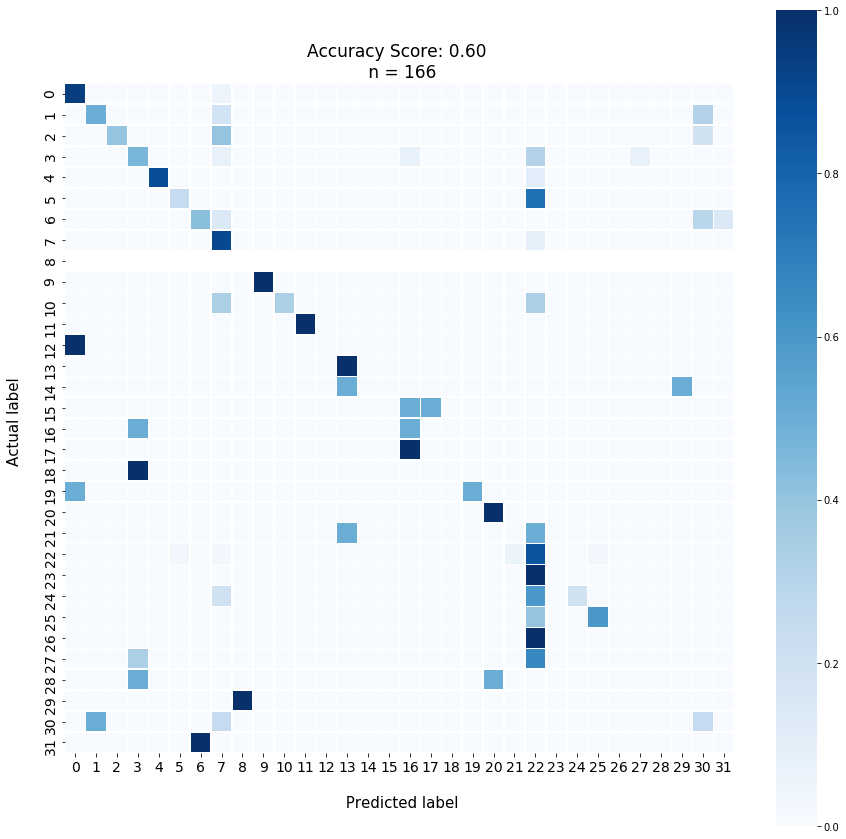

In [583]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))

sns.heatmap(cmn, annot=False, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', vmax=1)
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17)
plt.xticks(size=14)
plt.yticks(size=14)
#plt.savefig('human_confusion_matrix_ttype_200618.png', dpi =300)

In [452]:
mapper

{'Inh L1-2 PAX6 CDH12': 0,
 'Inh L1-2 PAX6 TNFAIP8L3': 1,
 'Inh L1-4 VIP PENK': 2,
 'Inh L1-2 LAMP5 DBP': 3,
 'Inh L1-2 SST BAGE2 (ADARB2+)': 4,
 'Inh L1-3 SST CALB1': 5,
 'Inh L1-4 LAMP5 LCP2 (rosehip)': 6,
 'Inh L2-6 LAMP5 CA1 (Igtp)': 7,
 'Inh L1 SST CHRNA4 (ADARB2+)': 8,
 'Inh L1-2 VIP TSPAN12': 9,
 'Inh L2-6 VIP QPCT': 10,
 'Inh L1-4 VIP CHRNA6': 11,
 'Inh L1-3 VIP ADAMTSL1': 12,
 'Inh L1-2 VIP PCDH20': 13,
 'Inh L2-5 VIP TYR': 14,
 'Inh L1-3 VIP CHRM2': 15,
 'Inh L1-3 VIP GGH': 16,
 'Inh L1-2 VIP LBH': 17,
 'Inh L2-3 VIP CASC6': 18,
 'Inh L2-4 VIP SPAG17': 19,
 'Inh L1-4 VIP OPRM1': 20,
 'Inh L3-5 SST ADGRG6': 21,
 'Inh L5-6 SST KLHDC8A': 22,
 'Inh L4-6 SST GXYLT2': 23,
 'Inh L4-5 SST STK32A': 24,
 'Inh L2-4 SST FRZB': 25,
 'Inh L2-4 PVALB WFDC2': 26,
 'Inh L5-6 SST TH': 27,
 'Inh L5-6 PVALB LGR5': 28,
 'Inh L4-5 PVALB MEPE': 29,
 'Inh L4-6 PVALB SULF1': 30,
 'Inh L5-6 SST MIR548F2': 31,
 'Inh L2-5 PVALB SCUBE3 (chandelier)': 32,
 'Exc L2-3 LINC00507 FREM3': 33,
 'Inh L4-6 SST B3

# Comparing human ME subclass predictions to ME morphology calss

In [454]:
predictions = pd.read_csv('ME_predictions.csv')
morpho = pd.read_csv('162_Human_ME_cells_Qual_Calls.csv')

In [459]:
morpho

,Project,Cell Specimen Id,Morpho type,Depth from Pia,Pinned Structure and Layer,63X Image series Link,Truncation,Cell Type
0,H301,571709783,BC - bituft,775.422360,MTG,http://lims2/focal_plane_image_series?id=57991...,apical - NA,dendrite type - aspiny
1,H301,611610514,BC - bituft - asc. ax.,1406.146913,MTG,http://lims2/focal_plane_image_series?id=63928...,apical - NA,dendrite type - aspiny
2,H301,571427524,BC - bituft - asc. ax.,1582.782723,MTG,http://lims2/focal_plane_image_series?id=58093...,apical - NA,dendrite type - aspiny
3,H301,541536216,BC - bituft - asc. ax.,963.471900,MTG,http://lims2/focal_plane_image_series?id=55042...,apical - NA,dendrite type - aspiny
4,H301,614651270,BC - bituft - asc. ax.,1120.947405,MTG,http://lims2/focal_plane_image_series?id=68123...,apical - NA,dendrite type - aspiny
...,...,...,...,...,...,...,...,...
157,H301,576095991,NGC,1969.045987,MFG,http://lims2/focal_plane_image_series?id=60487...,apical - NA,dendrite type - aspiny
158,H301,567742660,NON - MARTINOTTI,1722.769330,MTG,http://lims2/focal_plane_image_series?id=57392...,apical - NA,dendrite type - aspiny
159,H301,596036453,ROSEHIP,66.867155,MTG,http://lims2/focal_plane_image_series?id=60436...,apical - NA,dendrite type - sparsely spiny
160,H301,595568262,ROSEHIP,136.567075,MTG,http://lims2/focal_plane_image_series?id=60401...,apical - NA,dendrite type - sparsely spiny


In [463]:
ME_df = pd.merge(left = predictions, 
                    right = morpho, 
                    left_on = 'specimen_id', 
                    right_on = 'Cell Specimen Id', 
                    how = 'inner')

ME_df[['specimen_id', 'name', 'predicted_subclass', 'Morpho type', 'Cell Type']]#.to_csv('ME_pred_morpho.csv')

# Trying to classify Exc vs Inh first, then further classify to sublcass

In [530]:
features = ['upstroke_downstroke_ratio_long_square', 'tau',
       'ri', 'sag','threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
       'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
       'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
       'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']

culture_data = pd.read_csv('culture_ephys_200415.csv')
data = pd.read_csv('human_200428.csv')
data1 = pd.concat([culture_data, data])
data1['fast_ahp']= data1['threshold_v_short_square'] - data1['fast_trough_v_short_square']
data1 = data1[data1['Norm_Marker_Sum.0.4_label']== True]
data1 = data1[data1['subclass_label'].isin(['LAMP5/PAX6/Other','PVALB', 'SST', 'VIP','IT (L2-3)','IT (L3-5)','IT (L4-6)','L5 ET', 'IT (L6)','L6b', 'L5/6 NP', 'L5/6 CT'])]
data1 = data1[['broad_class_label', 'subclass_label'] + features]
data1 = data1.dropna()

df_maj = data1[data1['broad_class_label'] == 'GABAergic neuron']
df_min = data1[data1['broad_class_label'] == 'Glutamatergic neuron']


df_maj_downsampled = resample(df_maj, 
                                 replace=False,     
                                 n_samples=454,    
                                 random_state=1) 

df = pd.concat([df_min, df_maj_downsampled])

unique= df['broad_class_label'].unique()
mapper = {k: i for i, k in enumerate(unique)}
targets = np.array(df['broad_class_label'].map(mapper))
df['class'] = targets



data_targets = df.drop(['broad_class_label','subclass_label'], axis =1)
unscaled_inputs = data_targets.iloc[:,:-1]
class_scaler = StandardScaler()
class_scaler.fit(unscaled_inputs)
scaled_inputs = subclass_scaler.transform(unscaled_inputs)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20)


classifier = RandomForestClassifier(n_estimators=60, random_state= 0)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)
scores = cross_val_score(classifier, scaled_inputs, targets, cv=5)
scores


C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


array([0.95604396, 0.95054945, 0.89010989, 0.9281768 , 0.89502762])

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

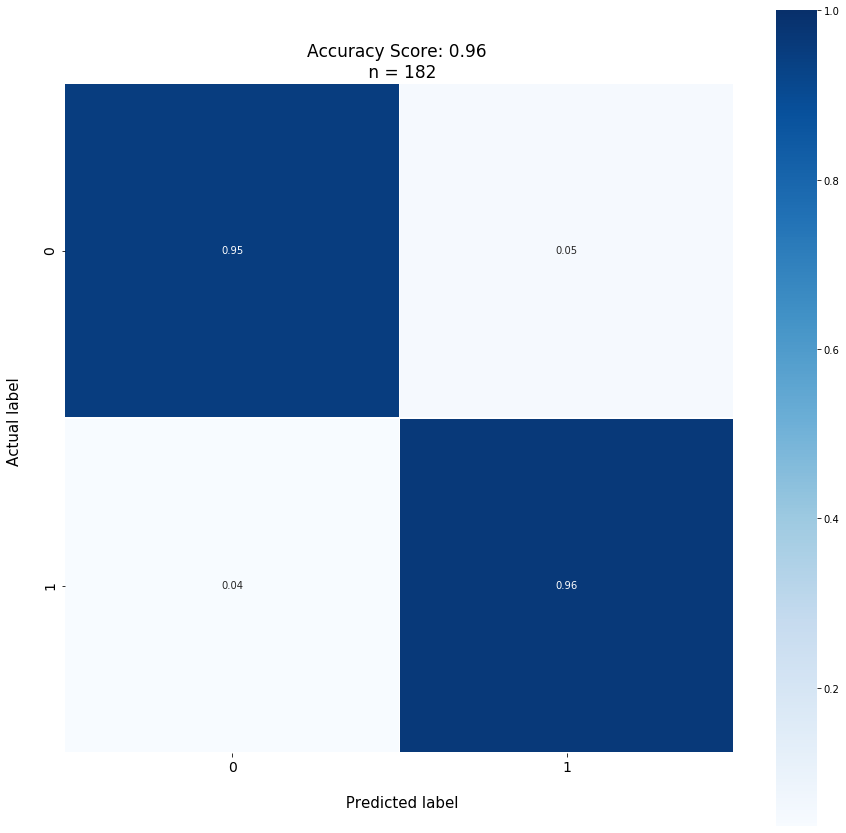

In [531]:
score = classifier.score(x_test,y_test)
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15,15))

sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', vmax=1)
plt.ylabel('Actual label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'Accuracy Score: {:.2f} \n n = {}'.format(score, predictions.size)
plt.title(all_sample_title, size = 17)
plt.xticks(size=14)
plt.yticks(size=14)
#plt.savefig('human_confusion_matrix_200511.png', dpi =300)

In [537]:
mapper

{'Glutamatergic neuron': 0, 'GABAergic neuron': 1}

In [533]:
with open('human_broadclass_model', 'wb') as file:
    pickle.dump(classifier, file)
    
with open('human_broadclass_scaler', 'wb') as file:
    pickle.dump(class_scaler, file)

In [551]:
class Class_model():
    
    def __init__(self, model_file, scaler_file, model_file2, scaler_file2):
        #read model and scaler files which were saved
        with open('human_broadclass_model', 'rb') as model_file, open('human_broadclass_scaler', 'rb') as scaler_file, open('human_subclass_model', 'rb') as model_file2 ,open('human_subclass_scaler', 'rb') as scaler_file2:
            self.classifier = pickle.load(model_file)
            self.scaler = pickle.load(scaler_file)
            self.classifier2 = pickle.load(model_file2)
            self.scaler2 = pickle.load(scaler_file2)
            
            self.data = None
            
    def load_and_clean_data(self, data_file):
        #import data
        df = pd.read_csv(data_file)
        #store data in a new variable for later use
        self.df_with_predicitons = df.copy()
        df['fast_ahp']= df['threshold_v_short_square'] - df['fast_trough_v_short_square']

    
    
        features = ['upstroke_downstroke_ratio_long_square', 'tau',
               'ri', 'sag',
               'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
               'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
               'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
               'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']        
        
        
        df2 = df[features + ['specimen_id', 'name']]
        df = df[features]
        df = df.dropna()
        df2 = df2.dropna()
        self.preprocessed_data = df2.copy()
        
        self.data = self.scaler.transform(df)
        
    def load_and_clean_data2(self, data_file):
        #import data
        df = pd.read_csv(data_file)
        #store data in a new variable for later use
        self.df_with_predicitons = df.copy()
        df['fast_ahp']= df['threshold_v_short_square'] - df['fast_trough_v_short_square']

    
    
        features = ['upstroke_downstroke_ratio_long_square', 'tau',
               'ri', 'sag',
               'threshold_i_short_square', 'fast_ahp', 'latency', 'adaptation',
               'fast_trough_v_long_square', 'fast_trough_v_ramp', 'threshold_i_ramp',
               'threshold_t_ramp', 'avg_isi', 'threshold_v_ramp',
               'threshold_v_long_square', 'peak_v_long_square', 'trough_v_ramp']        
        
        
        df2 = df[features + ['specimen_id', 'name']]
        df = df[features]
        df = df.dropna()
        df2 = df2.dropna()
        self.preprocessed_data = df2.copy()
        
        self.data = self.scaler2.transform(df)    
    

        
    def predicted_probability(self):
        if (self.data is not None):
            pred = self.classifier.predict_proba(self.data)
            return pred
        
    def predicted_output_category(self):
        if (self.data is not None):
            pred_outputs = self.classifier.predict(self.data)
            return pred_outputs
            
    def predicted_outputs(self):
        targets = {0:'Excitatory', 1: 'Inhibitory'}
        if (self.data is not None):
            self.preprocessed_data['prediction'] = self.classifier.predict(self.data)
            #return self.preprocessed_data[['specimen_id','name','qualitative call','prediction']]
            self.preprocessed_data['predicted_subclass'] = self.preprocessed_data['prediction'].map(targets)
        
            #return self.preprocessed_data[['specimen_id','name','prediction','predicted_subclass']]
            return self.preprocessed_data[['specimen_id','prediction','predicted_subclass']]
  
    def predicted_outputs2(self):
        targets = {0:'LAMP5', 1: 'PV', 2:'SST', 3: 'VIP'}
        if (self.data is not None):
            self.preprocessed_data['prediction'] = self.classifier.predict(self.data)
            #return self.preprocessed_data[['specimen_id','name','qualitative call','prediction']]
            
            self.inh = self.preprocessed_data[self.preprocessed_data['prediction'] == 1]
            
            self.inh['prediction'] = self.classifier2.predict(self.data)
            self.inh['predicted_subclass'] = self.preprocessed_data['prediction'].map(targets)
        
            #return self.preprocessed_data[['specimen_id','name','prediction','predicted_subclass']]
            return self.inh[['specimen_id','prediction','predicted_subclass']]
     

In [546]:
model_file = pickle.load(open('human_broadclass_model', 'rb'))
scaler_file = pickle.load(open('human_broadclass_scaler', 'rb'))
model_file2 = pickle.load(open('human_subclass_model', 'rb'))
scaler_file2 = pickle.load(open('human_subclass_scaler', 'rb'))

In [580]:
test = Class_model(model_file, scaler_file, model_file2, scaler_file2)
test.load_and_clean_data('ME_200501.csv')
inh = test.predicted_outputs()
inh= inh[inh['predicted_subclass'] == 'Inhibitory']
inh[['specimen_id']]

,specimen_id
2,485537619.0
5,486749782.0
7,488385201.0
8,488386399.0
11,488386504.0
...,...
890,642981071.0
891,643572206.0
894,643584386.0
897,643601251.0


In [ ]:
# need to find some way to first run class_model and then run subclass_model on only the specimen ids for inh

In [570]:
test2 = Subclass_model(model_file, scaler_file)
model_file = pickle.load(open('human_subclass_model', 'rb'))
scaler_file = pickle.load(open('human_subclass_scaler', 'rb'))
test2.load_and_clean_data('inh.csv')
test2.predicted_outputs()


KeyError: 'threshold_v_short_square'